# Example Usage

In [2]:
from imcp import mcp_curve, mcp_score, plot_mcp_curve, imcp_curve, imcp_score, plot_imcp_curve, plot_curve

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

import pandas as pd

## MCP curve

### Single MCP curve

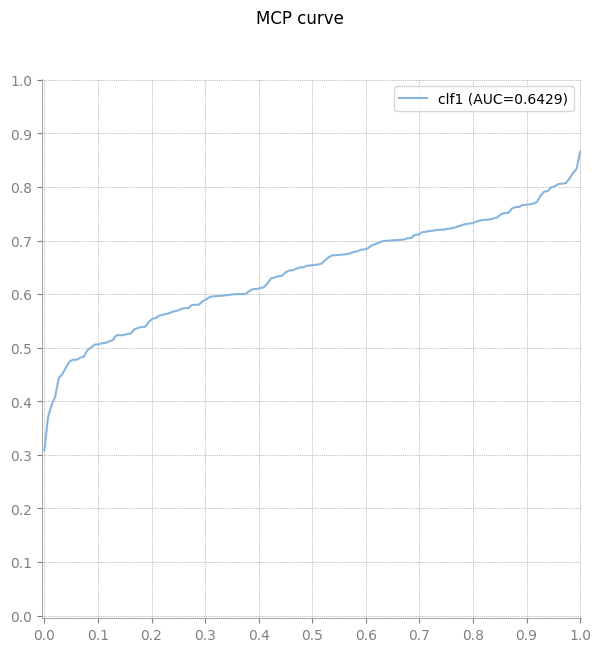

Area under MCP curve: 0.6429


In [3]:
X, y = load_iris(return_X_y=True)

clf = LogisticRegression(solver="liblinear").fit(X, y)
probabilities = clf.predict_proba(X)
plot_mcp_curve(y, probabilities)

area = mcp_score(y, probabilities)
print("Area under MCP curve: {:.4f}".format(area))

### Multiple MCP curves

More plots can be drawn on the same figure to make comparison between curves easier. Example below presents curves calculated for different ways of obtaining class probabilities.

Area under MCP curve for LogisticRegression: 0.6429
Area under MCP curve for RandomForestClassifier: 0.9549
Area under MCP curve for GradientBoostingClassifier: 0.9927
Area under MCP curve for SVC: 0.8368


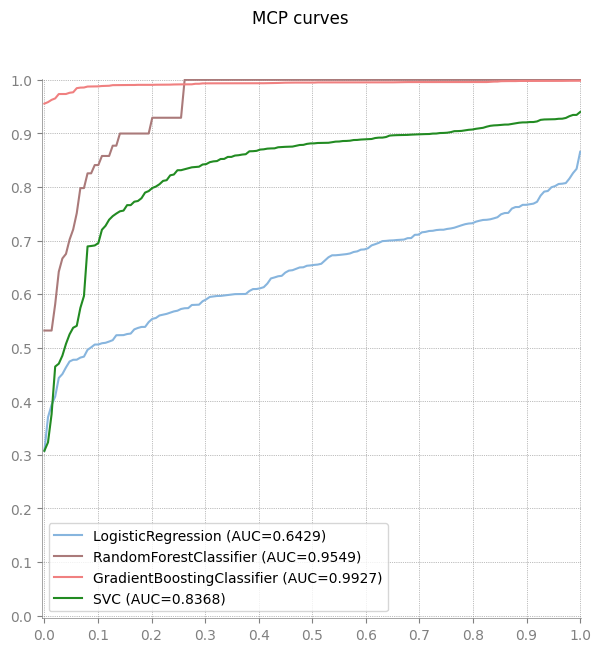

In [4]:
X, y = load_iris(return_X_y=True)
algorithms = {'LogisticRegression': LogisticRegression(solver='liblinear'),
             'RandomForestClassifier': RandomForestClassifier(random_state=42),
             'GradientBoostingClassifier': GradientBoostingClassifier(),
             'SVC': SVC(probability=True),}

scores = {}
for key in algorithms:
    algorithms[key].fit(X, y)
    score = algorithms[key].predict_proba(X)
    scores[key] = score
    area = mcp_score(y, score)
    print('Area under MCP curve for {}: {:.4f}'.format(key, area))

plot_mcp_curve(y, scores)

## IMCP curve

It is also possible to take into account disproportion of class distribution amongst given dataset. In such case, the width of bar for each sample is scaled. Class which covers less samples in the dataset will have wider bars.

There have been implemented analogous methods for all mcp methods - imcp_curve, imcp_score and plot_imcp_curve. 

Also, in case that user wants to plot, for example, regular curve and imbalanced curve on the same plot, the plot_curve method has been developed. It allows user to plot any number of curves given as arguments in the same style as plot_mcp_curve and plot_imcp_curve. It is also possible to save figure plot with that method after user has specified output figure path.

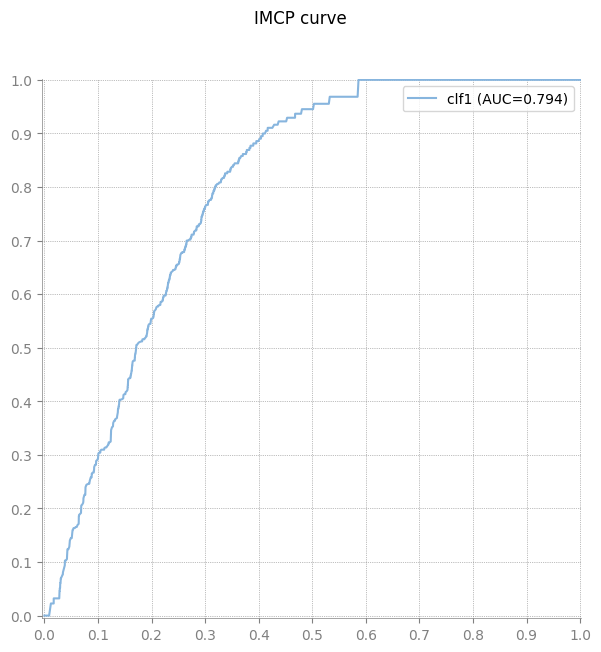

Area under IMCP curve: 0.7940


In [5]:
df = pd.read_csv('../../../../tests/test_imbalanced_class_probs.csv')

y_true = df["y_true"]
y_score = df.drop(["y_true"], axis=1)

plot_imcp_curve(y_true, y_score, abs_tolerance=0.0000001)

area = imcp_score(y_true, y_score, abs_tolerance=0.0000001)
print("Area under IMCP curve: {:.4f}".format(area))

Plotting regular MCP and IMCP on the same figure

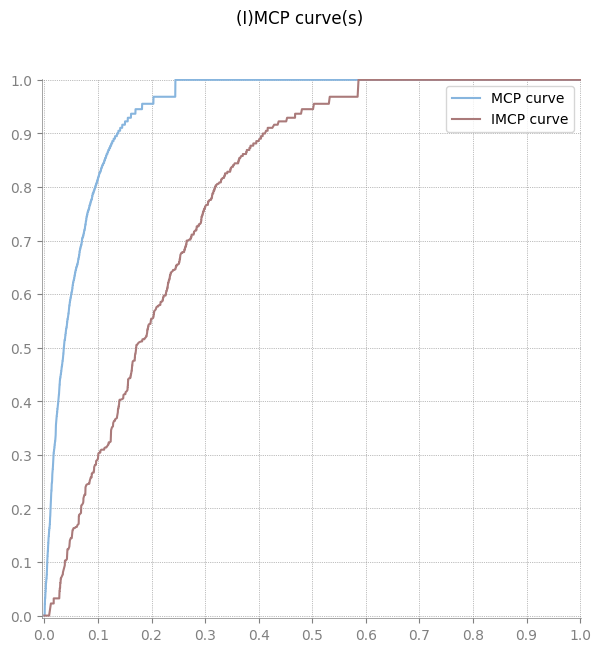

In [6]:
mcp_x, mcp_y = mcp_curve(y_true, y_score, abs_tolerance=0.0000001)
imcp_x, imcp_y = imcp_curve(y_true, y_score, abs_tolerance=0.0000001)

plot_curve([mcp_x, imcp_x], [mcp_y, imcp_y], label=["MCP curve", "IMCP curve"])